In [87]:
import MDSplus as mds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d

In [88]:
shot = 100000
cn  = mds.Connection('mds.ipp.ac.cn')

In [89]:
cn.openTree('east_1', shot)
ip = cn.get('\ipg')
ip = ip.data()
time_ip = cn.get('dim_of(\ipg)').data()
idx_begin = 6000
idx_end = np.argwhere(ip > 10)[-1, 0]  # The return value of argwhere is row * 1
cn.closeTree('east_1',shot)
idx_end

17825

In [90]:
# shot = int(input("shot: "))
# signal = input("signal: ")

cn.openTree('pcs_east', shot)
ne = cn.get('\\dfsdev2').data()
t_ne = cn.get('dim_of(\dfsdev2)').data()

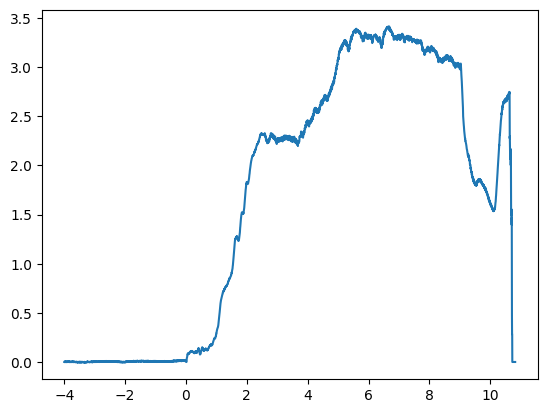

In [91]:
plt.plot(t_ne,ne)

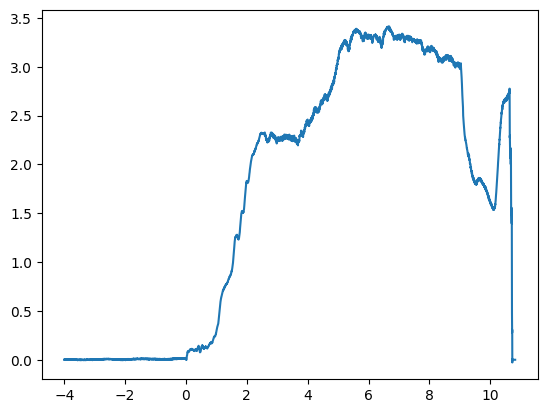

In [92]:
f = interp1d(t_ne,ne,kind='cubic')  # Original freq is 500HZ, convert it to 1000HZ
t_ne2 = np.arange(t_ne[0],t_ne[-1],0.001)   # t_ne start from -4s, so t[3000] is -1s
ne2 = f(t_ne2)                              # so idx_ne_begin = 3000, idx_ne_end = idx_end - idx_begin + idx_ne_begin
plt.plot(t_ne2,ne2)

In [93]:
t_ne2

array([-3.99999999, -3.99899999, -3.99799999, ..., 10.81500001,
       10.81600001, 10.81700001])

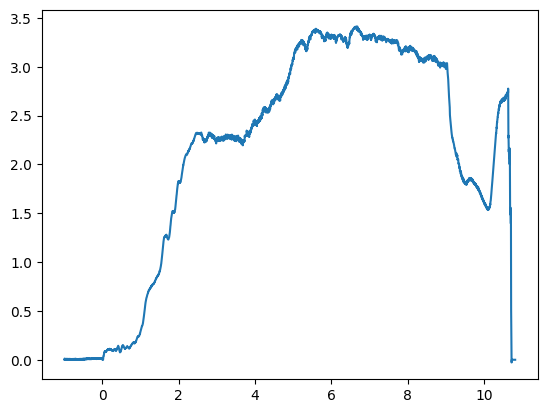

In [94]:
idx_ne_begin = 3000
idx_ne_end = idx_end - idx_begin + idx_ne_begin
plt.plot(t_ne2[idx_ne_begin:idx_ne_end],ne2[idx_ne_begin:idx_ne_end]) # 长度应该没问题

In [95]:
cn.openTree('efit_east',shot)
volume = cn.get('\\volume').data()
t_vol = cn.get('dim_of(\\volume)').data()

In [96]:
t_vol # 应该用统一的方法来处理

array([ 0.39,  0.48,  0.57,  0.66,  0.75,  0.84,  0.93,  1.02,  1.11,
        1.2 ,  1.29,  1.38,  1.47,  1.56,  1.65,  1.74,  1.83,  1.92,
        2.01,  2.1 ,  2.19,  2.28,  2.37,  2.46,  2.55,  2.64,  2.73,
        2.82,  2.91,  3.  ,  3.09,  3.18,  3.27,  3.36,  3.45,  3.54,
        3.63,  3.72,  3.81,  3.9 ,  3.99,  4.08,  4.17,  4.26,  4.35,
        4.44,  4.53,  4.62,  4.71,  4.8 ,  4.89,  4.98,  5.07,  5.16,
        5.25,  5.34,  5.43,  5.52,  5.61,  5.7 ,  5.79,  5.88,  5.97,
        6.06,  6.15,  6.24,  6.33,  6.42,  6.51,  6.6 ,  6.69,  6.78,
        6.87,  6.96,  7.05,  7.14,  7.23,  7.32,  7.41,  7.5 ,  7.59,
        7.68,  7.77,  7.86,  7.95,  8.04,  8.13,  8.22,  8.31,  8.4 ,
        8.49,  8.58,  8.67,  8.76,  8.85,  8.94,  9.03,  9.12,  9.21,
        9.3 ,  9.39,  9.48,  9.57,  9.66,  9.75,  9.84,  9.93, 10.02,
       10.11, 10.2 , 10.29, 10.38, 10.47, 10.56, 10.65])

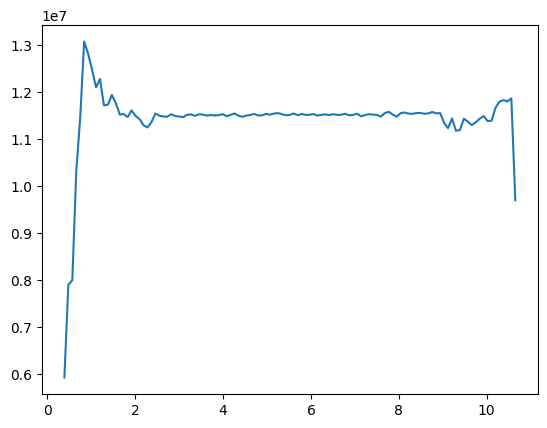

In [97]:
plt.plot(t_vol,volume)

In [98]:
f_v = interp1d(t_vol,volume,kind='cubic')
old_s = int((t_vol[0]-time_ip[0])*1000)
old_e = int((t_vol[-1]-time_ip[0])*1000)
V_plasma = f_v(time_ip[s:e])
len(V_plasma)

10260

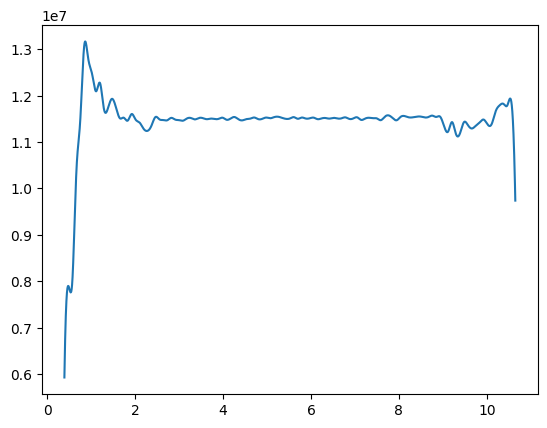

In [99]:
plt.plot(time_ip[old_s:old_e],V_plasma)

In [101]:
V_plasma_long = np.zeros(idx_end-idx_begin)
len(V_plasma_long)

11825

In [106]:
len(V_plasma_long[old_s:old_e])


4435

In [ ]:
plt.plot(time_ip[idx_begin:idx_end],V_plasma_long)
len(V_plasma_long)

In [103]:
old_s

7390

In [104]:
old_e

17650